In [1]:
#load the labraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
df = pd.read_csv("creditcard.csv")

#To show first 5 record
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#To check the null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
#Cross check with datatypes
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
#To check the ducpicated value in our dataset
df.duplicated().sum()

1081

In [6]:
#To show number of rows and columns
df.shape

(284807, 31)

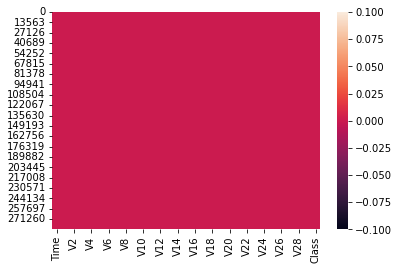

In [7]:
#visualize the null value 
sb.heatmap(df.isnull())
plt.show()

0    284315
1       492
Name: Class, dtype: int64


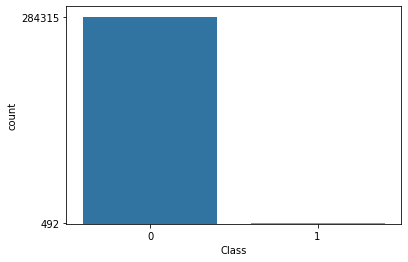

In [8]:
#To check the dataset is balance or unbalance
#Here our target is Class 
#Condition: if Class is 1 represent fraud transaction and 0 represent normal transaction
f = df["Class"].value_counts()
print(f)

sb.countplot(data=df,x="Class")
plt.yticks(f)
plt.show()

In [9]:
#this is dataset is unbalance 
#So now we balance the dataset by RandomOverSampler

In [10]:
#1st we select input and output from our dataset
x = df.drop("Class",axis=1)   #input
y = df["Class"]

In [11]:
#Slipt the dataset into 70-30% model
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [12]:
#Apply StandardScaler into our dataset
from sklearn.preprocessing import StandardScaler

#create object for StandardScaler class
ss = StandardScaler()

#To convert into a numpy array 
x_train = ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [13]:
#first check y_train (0 and 1) : how many sample of 0's and 1's
y_train.value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [14]:
#Now we apply RandomOverSampler 
from imblearn.over_sampling import RandomOverSampler
#RandomOverSampler inbuilt class which is outer class over_sampling and 
#over_sampling class define in inbuilt package imblearn

In [15]:
#create an object for RandomOverSampler class
ros = RandomOverSampler()
x_train1,y_train1 = ros.fit_resample(x_train,y_train)
#fit_resample() inbuilt method of RandomOverSampler class 

In [16]:
x_train1.shape , y_train1.shape

((398014, 30), (398014,))

In [17]:
y_train1.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [18]:
#check testing data
x_test.shape , y_test.shape

((85443, 30), (85443,))

In [19]:
y_test.value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [20]:
#Apply RandomOverSampler on testing data
x_test1,y_test1 = ros.fit_resample(x_test,y_test)

In [21]:
#check 
y_test1.value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [22]:
#create user define function
def create_model(model):
    model.fit(x_train,y_train) #train the model with 70% data
    y_pred = model.predict(x_test)  #model test with 30% data
    
    #generate Report
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    
    return model

In [23]:
#call the class
from sklearn.metrics import classification_report , confusion_matrix

In [24]:
#1. Performing Base Model means Linear regression
from sklearn.linear_model import LogisticRegression

In [25]:
#create an object for LinearRegression class
lr = LogisticRegression()

#call the function
lr = create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.58      0.68       135

    accuracy                           1.00     85443
   macro avg       0.92      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443

[[85293    15]
 [   57    78]]


In [26]:
#2. Classification Model : Decision Forest Classification
#call the inbuilt class
from sklearn.tree import DecisionTreeClassifier

In [27]:
#create an object for DecisionTreeClassifier class
dtc = DecisionTreeClassifier(random_state=1)  #by default GINI Index

#call function
dtc = create_model(dtc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.73      0.73      0.73       135

    accuracy                           1.00     85443
   macro avg       0.86      0.87      0.87     85443
weighted avg       1.00      1.00      1.00     85443

[[85271    37]
 [   36    99]]


In [28]:
#Create Information Gain
dict1 = {"Input":x.columns,"IG":dtc.feature_importances_}
df2 = pd.DataFrame(dict1)
df2.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,V17,0.549237
1,V14,0.095711
2,V10,0.086110
3,Time,0.042388
4,V21,0.028209
5,V4,0.019497
6,V26,0.018988
7,V20,0.015216
8,V11,0.013917
9,V15,0.013532


In [29]:
#Drow a tree 
from sklearn import tree

#plt.figure(figsize=(30,30))
f = x.columns
#_ = tree.plot_tree(dtc,feature_names=f,filled=True)
plt.show()

In [30]:
#We get recall score 0.73(73%) which is good , but we can do better
#So we apply pruning technique on DecisionTreeClassifier. There are 2 types of pruning tech.
#1.Max Depth : between >=1 to <=8 we apply for-loop
#for i in range(1,9):
    #create an object for DecisionTreeClassifier class with max_depth
#    dtc1 = DecisionTreeClassifier(random_state=1,max_depth=i)
#    print("Max Depth:",i)
    #call the function
#    dtc1 = create_model(dtc1)

In [31]:
#got the best score at 4
dtc1 = DecisionTreeClassifier(random_state=1,max_depth=4)
#call the function
dtc1 = create_model(dtc1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.82      0.73      0.78       135

    accuracy                           1.00     85443
   macro avg       0.91      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443

[[85287    21]
 [   36    99]]


In [32]:
#Create Information Gain
dict2 = {"Input":x.columns,"IG":dtc1.feature_importances_}
df3 = pd.DataFrame(dict2)
df3.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,V17,0.712345
1,V10,0.102442
2,V14,0.088048
3,Time,0.042885
4,V21,0.022085
5,V26,0.018184
6,V11,0.007177
7,V3,0.006834
8,V19,0.000000
9,V20,0.000000


In [33]:
#2.Mim Sample Leaf : between >=45 to <=100, so apply for-loop
#for i in range(45,101):
    #create an object for DecisionTreeClassifier class with min_samples_leaf
#    dtc2 = DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
#    print("Min Sample Leaf:",i)
    #call the function
#    dtc2 = create_model(dtc2)

In [34]:
#Got the best score at 47
dtc2 = DecisionTreeClassifier(random_state=1,min_samples_leaf=47)
#call function
dtc2 = create_model(dtc2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.79      0.68      0.73       135

    accuracy                           1.00     85443
   macro avg       0.90      0.84      0.87     85443
weighted avg       1.00      1.00      1.00     85443

[[85284    24]
 [   43    92]]


In [35]:
#Create Information Gain
dict3 = {"Input":x.columns,"IG":dtc2.feature_importances_}
df4 = pd.DataFrame(dict3)
df4.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,V17,0.786735
1,V10,0.106754
2,V14,0.070965
3,V26,0.019063
4,V4,0.008558
5,V1,0.002733
6,V25,0.001331
7,V13,0.000809
8,V23,0.000555
9,V7,0.000333


In [36]:
#2. Applying Decision Tree with Entropy Index
#create an object for DecisionTreeClassifier class with Entropy index
dtc_entropy = DecisionTreeClassifier(random_state=1,criterion='entropy')
#call the function
dtc_entropy = create_model(dtc_entropy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.74      0.72      0.73       135

    accuracy                           1.00     85443
   macro avg       0.87      0.86      0.86     85443
weighted avg       1.00      1.00      1.00     85443

[[85274    34]
 [   38    97]]


In [37]:
#Create Information Gain
dict4 = {"Input":x.columns,"IG":dtc_entropy.feature_importances_}
df5 = pd.DataFrame(dict4)
df5.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,V17,0.606617
1,V14,0.120693
2,V10,0.047953
3,V4,0.030188
4,V13,0.020758
5,V26,0.017341
6,V16,0.016688
7,Time,0.014860
8,Amount,0.014200
9,V1,0.012149


In [38]:
#Draw a tree

f = x.columns
#_ = tree.plot_tree(dtc_entropy,feature_names=f,filled=True)
plt.show()

In [39]:
#Now apply Pruning technique on DecisionTreeClassifier with entropy index
#1.max_depth on entropy index : between >=1 to <=8 aplly for-loop
#create an object for DecisionTreeClassifier class 
#for i in range(1,9):
#    dtc_entropy1 = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)
#    print("Max Depth:",i)
    #call function
#    dtc_entropy1 = create_model(dtc_entropy1)

In [40]:
#we got best score at 3
dtc_entropy1 = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=3)
#call function
dtc_entropy1 = create_model(dtc_entropy1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.78      0.76      0.77       135

    accuracy                           1.00     85443
   macro avg       0.89      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

[[85279    29]
 [   32   103]]


In [41]:
#Create Information Gain
dict5 = {"Input":x.columns,"IG":dtc_entropy1.feature_importances_}
df6 = pd.DataFrame(dict5)
df6.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,V17,0.776397
1,V14,0.137186
2,V10,0.059453
3,V4,0.012504
4,V26,0.009276
5,V21,0.005184
6,Time,0.000000
7,V28,0.000000
8,V27,0.000000
9,V25,0.000000


In [42]:
#2.Pruning tech. min_samples_leaf : between >=45 to <=100 we apply for-loop
#for i in range(45,101):
#    dtc_entropy2 = DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)
#    print("Min Samples Leaf:",i)
    #call function
#    dtc_entropy2 = create_model(dtc_entropy2)

In [43]:
#got good score at 48
dtc_entropy2 = DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=48)
#call function
dtc_entropy2 = create_model(dtc_entropy2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.79      0.73      0.76       135

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443

[[85282    26]
 [   36    99]]


In [44]:
#Create Information Gain
dict6 = {"Input":x.columns,"IG":dtc_entropy2.feature_importances_}
df7 = pd.DataFrame(dict6)
df7.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,V17,0.704863
1,V14,0.132339
2,V10,0.051221
3,V4,0.015077
4,V26,0.011262
5,Amount,0.009936
6,V7,0.008624
7,V20,0.007657
8,V8,0.007373
9,Time,0.005348


In [45]:
#2nd classification is Random Forest classifier by default it takes GINI Index
from sklearn.ensemble import RandomForestClassifier

In [46]:
#create an object for RandomForestClassifier class
#it takes n_estimators means number of Iteration means no. of Decision tree
#n_estimators take >=10 and <=100
#for i in range(10,101):
#    rfc = RandomForestClassifier(n_estimators=i,random_state=1)
#    print("No. of Estimators:",i)
    #call function
#    rfc = create_model(rfc)

In [47]:
#Got best score at 13
rfc = RandomForestClassifier(n_estimators=13,random_state=1)
#call function
rfc = create_model(rfc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.94      0.76      0.84       135

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85301     7]
 [   32   103]]


In [48]:
#Create Information Gain
dict7 = {"Input":x.columns,"IG":rfc.feature_importances_}
df8 = pd.DataFrame(dict7)
df8.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,V12,0.214151
1,V17,0.134968
2,V14,0.113400
3,V9,0.081014
4,V11,0.060639
5,V10,0.054797
6,V16,0.046164
7,V7,0.024108
8,V21,0.022183
9,V4,0.019105


In [49]:
#Got the best recall score of 0.96(96%) which is best score
#Now apply pruning technique on RandomForestClassifier class
#1.Max Depth : between >=1 to <=8 apply for-loop
#for i in range(1,9):
#    rfc1 = RandomForestClassifier(n_estimators=13,random_state=1,max_depth=i)
#    print("Max Depth:",i)
    #call function
#    rfc1 = create_model(rfc1)

In [50]:
#Got the good score at 8
rfc1 = RandomForestClassifier(n_estimators=13,random_state=1,max_depth=8)
#call function
rfc1 = create_model(rfc1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.91      0.72      0.80       135

    accuracy                           1.00     85443
   macro avg       0.95      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443

[[85298    10]
 [   38    97]]


In [51]:
#Create Information Gain
dict8 = {"Input":x.columns,"IG":rfc1.feature_importances_}
df9 = pd.DataFrame(dict8)
df9.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,V12,0.258315
1,V17,0.133415
2,V14,0.121692
3,V9,0.082462
4,V10,0.064158
5,V11,0.060827
6,V16,0.057751
7,V4,0.022297
8,V6,0.015632
9,V3,0.015568


In [52]:
#Applying 2nd pruning technique Min Samples Leaf between >=45 to <=100 apply for-loop
#for i in range(45,101):
#    rfc2 = RandomForestClassifier(n_estimators=13,random_state=1,min_samples_leaf=i)
#    print("Min Samples Leaf:",i)
    #call function
#    rfc2 = create_model(rfc2)

In [53]:
#got good score at 45
rfc2 = RandomForestClassifier(n_estimators=10,random_state=1,min_samples_leaf=45)
#call function
rfc2 = create_model(rfc2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.81      0.64      0.72       135

    accuracy                           1.00     85443
   macro avg       0.91      0.82      0.86     85443
weighted avg       1.00      1.00      1.00     85443

[[85288    20]
 [   48    87]]


In [54]:
#Create Information Gain
dict9 = {"Input":x.columns,"IG":rfc2.feature_importances_}
df10 = pd.DataFrame(dict9)
df10.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,V12,0.276975
1,V17,0.255203
2,V14,0.147672
3,V9,0.085405
4,V11,0.083815
5,V10,0.077762
6,V6,0.019193
7,V2,0.011296
8,V26,0.007658
9,V18,0.006910


In [55]:
#Now Applying Boosting technique :
#1.ADA Boost : means Adaptor Boosting call the inbuilt class 
from sklearn.ensemble import AdaBoostClassifier

In [56]:
#create an object for AdaBoostClassifier class
#AdaBoostClassifier class as n_estimators means how many decision stump , 
#decision stump depends on number of inputs=30 , we aplly for-loop
#for i in range(1,30):
#    ada = AdaBoostClassifier(n_estimators=i,random_state=1)
#    print("No. of Estimators:",i)
    #call function
#    ada = create_model(ada)

In [57]:
#got good score at 1
ada = AdaBoostClassifier(n_estimators=1,random_state=1)
#call function
ada = create_model(ada)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.74      0.61      0.67       135

    accuracy                           1.00     85443
   macro avg       0.87      0.81      0.84     85443
weighted avg       1.00      1.00      1.00     85443

[[85279    29]
 [   52    83]]


In [58]:
#Create Information Gain
dict10 = {"Input":x.columns,"IG":ada.feature_importances_}
df11 = pd.DataFrame(dict10)
df11.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,V17,1.0
1,Time,0.0
2,V1,0.0
3,V28,0.0
4,V27,0.0
5,V26,0.0
6,V25,0.0
7,V24,0.0
8,V23,0.0
9,V22,0.0


In [59]:
#2.Gradient Boosting : call inbuilt function
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
#create an object for GradientBoostingClassifier class
#it has n_estimators means how many decision tree use for train the model
#n_estimators is >=10 and <=100 , we apply for-loop
#for i in range(10,101):
#    gbc = GradientBoostingClassifier(n_estimators=i,random_state=1)
#    print("No. of Estimators:",i)
    #call function
#    gbc = create_model(gbc)

In [61]:
#got good score at 45
gbc = GradientBoostingClassifier(n_estimators=45,random_state=1)
#call function
gbc = create_model(gbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.67      0.21      0.33       135

    accuracy                           1.00     85443
   macro avg       0.84      0.61      0.66     85443
weighted avg       1.00      1.00      1.00     85443

[[85294    14]
 [  106    29]]


In [62]:
#Create Information Gain
dict11 = {"Input":x.columns,"IG":gbc.feature_importances_}
df12 = pd.DataFrame(dict11)
df12.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,V16,0.542551
1,V17,0.117700
2,V10,0.101341
3,V14,0.099865
4,V12,0.083053
5,V26,0.034083
6,V27,0.008397
7,V9,0.001925
8,V7,0.001917
9,V4,0.001251


In [63]:
#3.Extreme Gradient Boosting : XGBoost classifier
#it is better vesion of gradient boosting , call inbuilt class
from xgboost import XGBClassifier

In [64]:
#create an object for XGBClassifier class 
#her it has n_estimators means how many decision tree is use for train the model 
#n_estimators is >=10 and <=100 , we apply for-loop
#for i in range(10,101):
#    xgb = XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
#    print("No. of Estimators:",i)
    #call function
#    xgb = create_model(xgb)

In [65]:
#got good score at 10
xgb = XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1)
#call function
xgb = create_model(xgb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.91      0.77      0.84       135

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85298    10]
 [   31   104]]


In [66]:
#Create Information Gain
dict12 = {"Input":x.columns,"IG":xgb.feature_importances_}
df13 = pd.DataFrame(dict12)
df13.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,V17,0.601151
1,V10,0.068365
2,V14,0.040962
3,Time,0.027654
4,V7,0.022135
5,V12,0.021843
6,V27,0.020768
7,V26,0.019045
8,V16,0.018462
9,V9,0.016992


In [67]:
#Now giving the data to Support Vector Machine
#1.Linear kernel function of Support Vector Machine means suppose data are linear
#separatable with the help of straight line
#call inbuilt class for Linear SVM : LinearSVC
from sklearn.svm import LinearSVC

In [68]:
#create an object for LinearSVC class
svc = LinearSVC(random_state=1)   
#no add any error means support no outlier in our dataset means it is hard margin

In [69]:
#call the function
svc = create_model(svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.85      0.66      0.74       135

    accuracy                           1.00     85443
   macro avg       0.92      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443

[[85292    16]
 [   46    89]]


In [ ]:
#By applying Support Vectors Machine in or dataset we got the recall score 0.66(66%)